# Verification of the V1 dataset

### Goal
In this notebook, we inspect that the V1 dataset has correctly been created.

In [34]:
import os
import sys
sys.path.append('../scripts/')
from gz_datasets import GZDataset
import matplotlib.pyplot as plt
import pandas as pd

### Load dataset

In [5]:
dirname = "/home/michael/Workspace/datasets/galaxy_zoo/"
filename = "dataset_v1.json"

path = os.path.join(dirname, filename)
print('Does dataset path exist ?', os.path.exists(path))

Does dataset path exist ? True


In [8]:
dataset_v1 = GZDataset().from_file(path, n_inputs=-1)

print('Dataset length:', len(dataset_v1.dataset))

Dataset length: 99417


### One example of conversation

In [16]:
dataset_v1.dataset[0]['conversations']

[{'from': 'human', 'value': 'What is the shape of the red object?'},
 {'from': 'gpt',
  'value': "I don't have enough information to answer that question."},
 {'from': 'human',
  'value': "Is the red object larger or smaller than the whitish object at 5 o'clock?"},
 {'from': 'gpt',
  'value': "I don't have enough information to answer that question."},
 {'from': 'human', 'value': 'Are there any other objects in the image?'},
 {'from': 'gpt',
  'value': "I don't have enough information to answer that question."}]

### Count the number of words generated by GPT for each conversation

In [9]:
n_words = []
for entry in dataset_v1.dataset:
    conversations = entry['conversations'] 
    n_words.append(len(conversations[1]['value'].split(' ')))  # from gpt

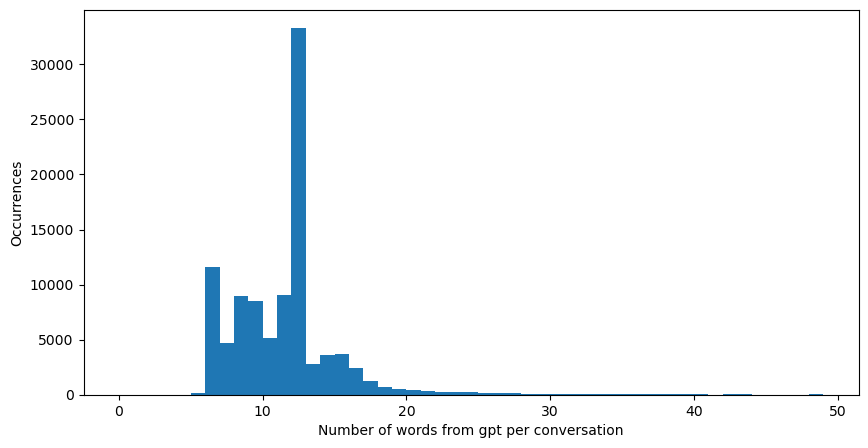

In [27]:
plt.figure(figsize=(10, 5))
plt.hist(n_words, bins=np.arange(50));
plt.xlabel('Number of words from gpt per conversation')
plt.ylabel('Occurrences')
# plt.savefig("/home/michael/Downloads/hist_v1_words.png")

### Calculate the ratio of "I don't have enough information to answer that question."

In [21]:
n_fails = []
for entry in dataset_v1.dataset:
    conversations = entry['conversations'] 
    count = 0
    for message in conversations:
        if message['from'] == 'gpt':
            if message['value'] == "I don't have enough information to answer that question.":
                count += 1
    n_fails.append(count)

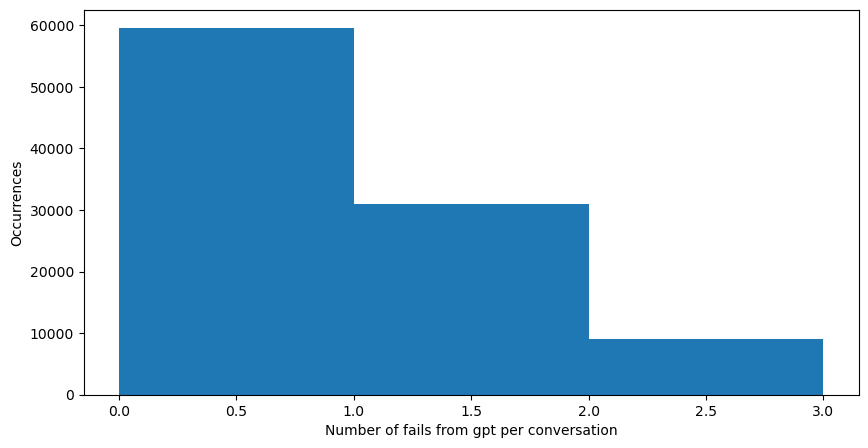

In [32]:
plt.figure(figsize=(10, 5))
plt.hist(n_fails, bins=[0, 1, 2, 3], align='mid');
plt.xlabel('Number of fails from gpt per conversation')
plt.ylabel('Occurrences')
plt.savefig("/home/michael/Downloads/hist_v1_fail.png")

In [38]:
pd.Series(n_fails).value_counts()

0    59524
1    30896
2     8761
3      236
Name: count, dtype: int64